In [1]:
# Machine Learning Aspect of the Project  

Raw Data:
   Year  Grand Total
0  2020        35937
1  2021        50319
2  2022        67315
3  2023        91153


/home/kali/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


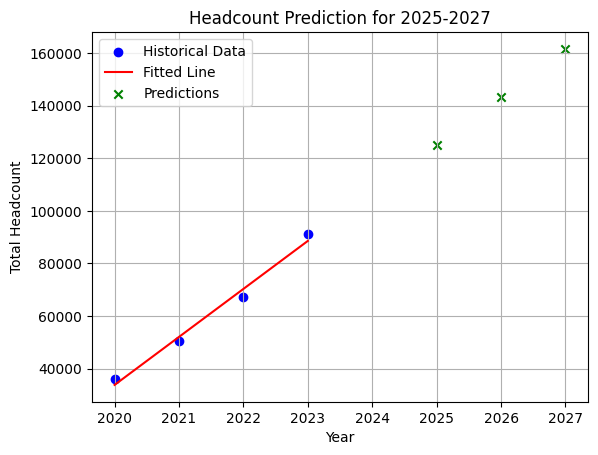

Forecasted Headcounts for 2025-2027:
   Year  Predicted Headcount
0  2025             125106.4
1  2026             143370.8
2  2027             161635.2
Predicted results saved to 'Linear_Regression_Headcount_Predictions.csv'


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the Exce file contating Yearly HeadCount data
df = pd.read_excel(r"Yearly Headcount.xlsx", sheet_name="Sheet1")

# Display the 'Year' column numeric foormat for regression
print("Raw Data:") 
print(df.head())

# Convert 'Year' to numeric format for regression
df['Year'] = pd.to_numeric(df['Year'])
X = df[['Year']]  # Independent variable
y = df['Grand Total']  # Dependent variable

# Train Linear Regression Model using historical data
model = LinearRegression()
model.fit(X, y)

# Predict Future Years
future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot historical data, the regression line, and the predictions for the future
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')  # Regression line
plt.scatter(future_years, future_predictions, color='green', marker='x', label='Predictions')
plt.title('Headcount Prediction for 2025-2027')
plt.xlabel('Year')
plt.ylabel('Total Headcount')
plt.legend()
plt.grid()
plt.show()

# Create a DataFrame for the predicited values and display them
predicted_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Headcount': future_predictions
})

print("Forecasted Headcounts for 2025-2027:")
print(predicted_df)

# Save Results to CSV
predicted_df.to_csv('Linear_Regression_Headcount_Predictions.csv', index=False)
print("Predicted results saved to 'Linear_Regression_Headcount_Predictions.csv'")
